# Student and Problem Set Info
---


## Title: MGSC 310: Problem Set 5

Author:

<Your name here>

# Comparative Analysis of Ensemble Methods: Random Forest, XGBoost

This notebook will guide you through a comparative analysis of different ensemble machine learning models using the 'Hitters' dataset from the ISLP library. We will focus on Random Forest, XGBoost to predict Major League Baseball player salaries.

# Setup

Pre-req:
- Install the `ISLP package`
- restart your runtime
- load the `Hitters` dataset found [here](https://islp.readthedocs.io/en/latest/datasets/Hitters.html) (data dictionary included in documentation).
- assign the `Hitters` data to the variable `hitters`

In [ ]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4124b4bf1ab16b25b4328dee5ccfb1e0a4ca1ca004c9e8507b2981d479ed7308
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [ ]:
from ISLP import load_data

hitters = load_data("Hitters")

In [ ]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# Question 1

1. Take the `League` column and assign 'A' to 1 and 'N' to 0. Call the new column `is_amer`.
2. Take the `Division` comlumn and assign 'W' to 1 and 'N' to 0. Call the new column `is_west`.
3. Take the `NewLeague` comlumn and assign 'A' to 1 and 'N' to 0. Call the new column `is_new`.
4. Find and replace `NaN` values in `Salary` with the mean of that player's respective league. If you do not know how to do this, research online. Hint: First find the mean value for the column. Then use .fillna()
5. Assign `is_west`, `is_amer`, `is_new` to the data type int. Hint: see .astype()
6. Assign the feature columns to the variable X. Features should be every column except `League`, `Division`, `NewLeague`,  `Salary`
7. Assign the target_variable y to `Salary`.
8. Explain to me the difference between where `is_amer` comes from (what it represents) versus `is_new`.
9. Train test split the X, y data with a test size of .18 and random_state of 589 and shuffle is True.

In [ ]:
# 1
hitters['is_amer'] = hitters['League'].map({'A': 1, 'N': 0})

# 2
hitters['is_west'] = hitters['Division'].map({'W': 1, 'E': 0})

# 3
hitters['is_new'] = hitters['NewLeague'].map({'A': 1, 'N': 0})

# 4
hitters['Salary'] = hitters['Salary'].fillna(hitters['Salary'].mean())

# 5
hitters[['is_amer', 'is_west','is_new']] = hitters[['is_amer', 'is_west','is_new']].astype("int")

# 7
X = hitters.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1)

# 8
y = hitters['Salary']

# 9
# league batter started in 1986 versus league batter ended in 1987


In [ ]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,is_amer,is_west,is_new
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,1,0,1
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,0,1,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,1,1,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,0,0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# 8
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.18,
                                                    random_state=586,
                                                    shuffle=True)

## Question 2:

1. Train a random forest regressor on X_train.
2. Set the number of estimators to 50, the random state to 84, and the `max_depth` to 6
3. Look into the documentation for the Random Forest Regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Choose 2 hyperparameters that are not at the default setting for the model and add them into the regressor.
4. What hyperparameters did you choose and why do you think they were applicable? Defend your choice by describing what the hyperparameter and how it relates to the data.
5. Fit your model.
6. Predict your data to the variable `rf_predictions`
7. Import the mean squared error function from sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). What is the error of your model? What does it mean?
8. In a new cell, run the model again, but this time choose different values for the hyperparameters you chose. Fit, predict, and get the mean squared error of the model. Continue doing this until you get a different error from your original model. Write about why you think your choice affected the model predictions.

In [ ]:
# 1, 2, 3
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=50,
                            random_state=84,
                            min_samples_split=3,
                            min_samples_leaf=4)

# 4
# There isn't a lot of data, so I don't want to overfit by allowing the model to
# split at 1 value, same goes for min samples per leaf: I want to avoid overfitting by
# allowing leaves to have 1 or 2 data points

#5
rf.fit(X_train, y_train)
# 6
rf_predictions = rf.predict(X_test)
#7
rf_error = mean_squared_error(y_test, rf_predictions)
rf_error

83105.93408715277

In [ ]:
#8
rf2 = RandomForestRegressor(n_estimators=50,
                             random_state=84,
                             min_samples_split=3,
                             min_samples_leaf=100)

rf2.fit(X_train, y_train)
rf2_predictions = rf2.predict(X_test)
rf2_accuracy = mean_squared_error(y_test, rf2_predictions)
rf2_accuracy

# because there are only 300 data points in the training set, and we already did
# a train test split of .18, that means there are 246 data points in our data.
# If you raise min samples per leaf to 100, that means there can only be
# 2 leaves instead of three in the dataset. That will cause underfitting and
# therefore error

149163.43919499524

# Question 3:

1. Go back to class 17 [here](https://colab.research.google.com/drive/1ZWr8d90JB7OjxVLX5jfhJ3TFSIfHluPM?usp=sharing). Choose any of the interpretable AI visuals we generated and implement them on your best fitting model from above. Ensure your visual is returned in the notebook. Feel free to copy and paste the code you need.
2. Explain what you think the visual means as it relates to predictions or features of the dataset.

Text(0.5, 0, 'Permutation Feature Importance')

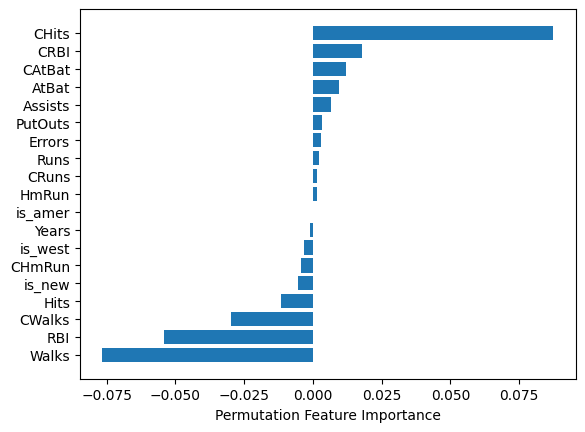

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test,
                                         n_repeats=30, random_state=45322)
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")


It looks like CHits is the variable of greatest importance. At face value, it seems that managers cared more about whether a batter could hit a ball versus if they are walked. This is interesting because in modern baseball, those who get on base in any way are often prized. Walks for its part either has great variance or simply those who get walked a lot tend not to be useful for predicting salary.

## Question 4

Now you will perform similar predictions using XGBoost

1. Train an xgboost regressor on X_train.
2. Set the number of estimators to 50, the random state to 84, and the `max_depth` to 6
3. Look into the documentation for the Xgboost Regressor [here](https://docs.getml.com/1.1.0/api/getml.predictors.XGBoostRegressor.html#). Choose 2 hyperparameters that are not at the default setting for the model and add them into the regressor.
4. Fit your model.
5. Predict your data to the variable `xgb_predictions`
6. Import the mean squared error function from sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). What is the error of your model? What does it mean?
7. In a new cell, run the model again, but this time choose different values for the hyperparameters you chose. Fit, predict, and get the mean squared error of the model. Continue doing this until you get a different error from your original model. Write about why you think your choice affected the model predictions.


In [ ]:
# 1, 2, 3
import xgboost
from sklearn.metrics import mean_squared_error

xgb = xgboost.XGBRegressor(n_estimators=50,
                            random_state=84,
                            learning_rate=.2,
                            max_delta_step=.1)

#4
xgb.fit(X_train, y_train)
# 5
xgb_predictions = xgb.predict(X_test)
#6
xgb_error = mean_squared_error(y_test, xgb_predictions)
xgb_error

149228.80347264285

In [ ]:
#8
xgb2 = xgboost.XGBRegressor(n_estimators=50,
                            random_state=84,
                            learning_rate=.9,
                            max_delta_step=.8,
                            enable_categorical=True)


xgb2.fit(X_train, y_train)

xgb2_predictions = xgb2.predict(X_test)

xgb2_error = mean_squared_error(y_test, xgb2_predictions)
xgb2_error

# looks like by increasing the learning rate and max delta step moved
# the gradients faster towards a local or global minima. By doing so,
# I basically allowed the iterations to explore the space more and find
# lift.

136341.30095315163

# Question 4:

1. You will now go back to class 17 [here](https://colab.research.google.com/drive/1ZWr8d90JB7OjxVLX5jfhJ3TFSIfHluPM?usp=sharing) and use a *different* AI visual metric to interpret your results than you used above. Do the same thing: implement it on your best performing XGBoost model.
2. Explain what you think the visual means as it relates to predictions or features of the dataset.

In [ ]:
! pip install shap

[00:29:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


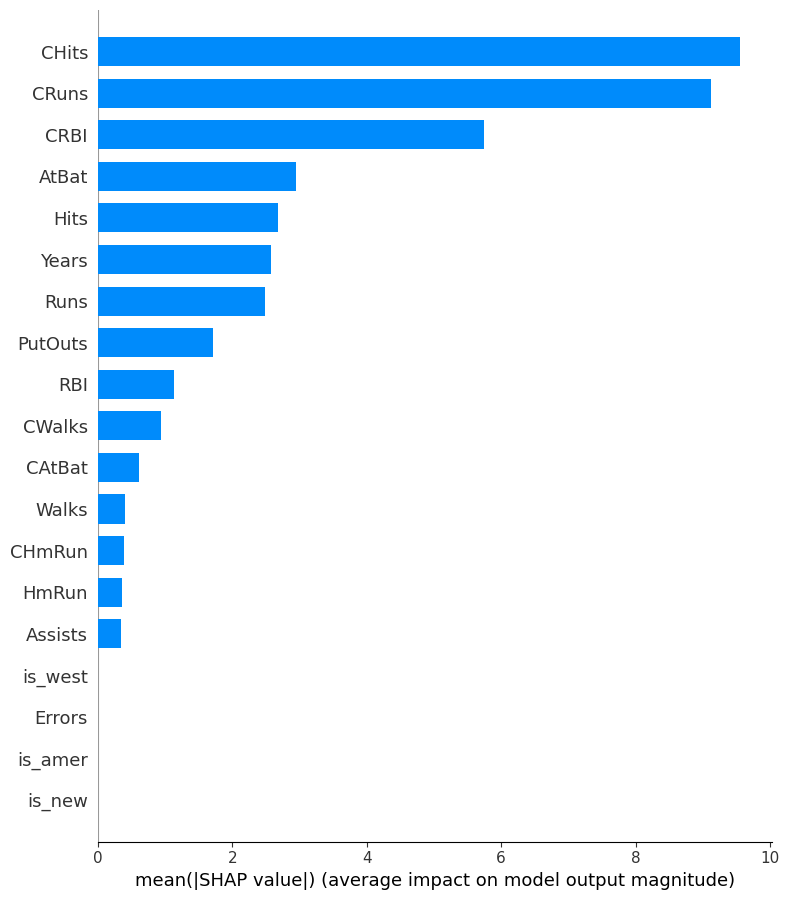

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb2)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Chits still most important. Binary variables utterly useless.